<a href="https://colab.research.google.com/github/Prishi99/Siamese-Neural-Network/blob/main/Siamese_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape , y_train.shape , X_test.shape , y_test.shape


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model

img_A_inp = Input((28,28), name = 'imag_A_inp')
img_B_inp = Input((28,28), name = 'img_A_inp')

In [9]:
def get_cnn_block(depth):
  return Sequential([Conv2D(depth,3,1),
                     BatchNormalization(),
                     ReLU()])
DEPTH = 64
cnn = Sequential([Reshape((28,28,1)),
                      get_cnn_block(DEPTH),
                                    get_cnn_block(DEPTH*2),
                                    get_cnn_block(DEPTH*8),
                                    GlobalAveragePooling2D(),
                                    Dense(64, activation = 'relu')])

feature_vector_A = cnn(img_A_inp)
feature_vector_B = cnn(img_B_inp)

concat = Concatenate()([feature_vector_A, feature_vector_B])

dense = Dense(64, activation = 'relu')(concat)

output = Dense(1, activation = 'sigmoid')(dense)

model = Model(inputs = [img_A_inp, img_B_inp], outputs = output)

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ imag_A_inp          │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ img_A_inp           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_3        │ (None, 64)        │    700,480 │ imag_A_inp[0][0], │
│ (Sequential)        │                   │            │ img_A_inp[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ sequential_3[0][… │
│ (Concatenate)       │                   │            │ sequential_3[1][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 708,801 (2.70 MB)

 Trainable params: 707,393 (2.70 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [10]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ imag_A_inp          │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ img_A_inp           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_3        │ (None, 64)        │    700,480 │ imag_A_inp[0][0], │
│ (Sequential)        │                   │            │ img_A_inp[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ sequential_3[0][… │
│ (Concatenate)       │                   │            │ sequential_3[1][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 708,801 (2.70 MB)

 Trainable params: 707,393 (2.70 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [11]:
import numpy as np

random_indices = np.random.choice(X_train.shape[0],300, replace = False)

X_train_sample, y_train_sample = X_train[random_indices], y_train[random_indices]

X_train_sample.shape, y_train_sample.shape

((300, 28, 28), (300,))

In [12]:
len(X_train_sample)**2

90000

In [13]:
import itertools

def make_paired_dataset(X, y):
  X_pairs, y_pairs = [], []

  tuples = [(x1, y1) for x1, y1 in zip(X,y)]
  for t in itertools.product(tuples, tuples):
    pair_A, pair_B = t
    img_A, label_A = t[0]
    img_B, label_B = t[1]

    new_label = int(label_A == label_B)

    X_pairs.append([img_A, img_B])
    y_pairs.append(new_label)

  X_pairs = np.array(X_pairs)
  y_pairs = np.array(y_pairs)

  return X_pairs, y_pairs

In [14]:
make_paired_dataset(X_train_sample, y_train_sample)

(array([[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
 
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],
 
 
        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
 
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],
 
 
        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0

In [15]:
X_train_pairs, y_train_pairs = make_paired_dataset(X_train_sample, y_train_sample)

X_train_pairs.shape , y_train_pairs.shape


((90000, 2, 28, 28), (90000,))

In [16]:
random_indices = np.random.choice(X_test.shape[0], 150, replace=False)

X_test_sample, y_test_sample = X_test[random_indices], y_test[random_indices]

X_test_sample.shape, y_test_sample.shape

((150, 28, 28), (150,))

In [17]:
X_test_pairs, y_test_pairs = make_paired_dataset(X_test_sample, y_test_sample)

X_test_pairs.shape, y_test_pairs.shape

((22500, 2, 28, 28), (22500,))

In [18]:
model.compile(loss = 'binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=3)

In [20]:
model.fit(
    x=[X_train_pairs[:, 0, :, :], X_train_pairs[:, 1, :, :]],
    y=y_train_pairs,
    validation_data=([X_test_pairs[:, 0, :, :], X_test_pairs[:, 1, :, :]], y_test_pairs),
    epochs=10,
    batch_size=32,
    callbacks=[es]
)


Epoch 1/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 98s 32ms/step - accuracy: 0.9031 - loss: 0.2739 - val_accuracy: 0.8824 - val_loss: 0.2778
Epoch 2/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 136s 31ms/step - accuracy: 0.9593 - loss: 0.0974 - val_accuracy: 0.9259 - val_loss: 0.2448
Epoch 3/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 87s 31ms/step - accuracy: 0.9927 - loss: 0.0231 - val_accuracy: 0.9313 - val_loss: 0.3151
Epoch 4/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 88s 31ms/step - accuracy: 0.9967 - loss: 0.0103 - val_accuracy: 0.9309 - val_loss: 0.3545
Epoch 5/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 142s 31ms/step - accuracy: 0.9972 - loss: 0.0096 - val_accuracy: 0.9357 - val_loss: 0.3502


In [26]:
img_A, img_B = X_test[0], X_test[8]
label_A, label_B = y_test[0], y_test[17]

label_A, label_B

(np.uint8(7), np.uint8(7))

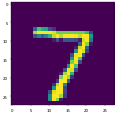

In [30]:
import matplotlib.pyplot as plt

plt.figure(dpi=28)
plt.imshow(img_A)

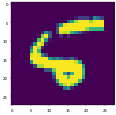

In [31]:
plt.figure(dpi=28)
plt.imshow(img_B)

In [32]:
model.predict([img_A.reshape((1,28,28)), img_B.reshape((1,28,28))]).flatten() > 0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([False])